In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
data =pd.read_csv('Train.csv',index_col= 'Item_Identifier')
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
data.shape

(8523, 11)

In [3]:
sales=data['Item_Outlet_Sales']
sales.head(5)

Item_Identifier
FDA15    3735.1380
DRC01     443.4228
FDN15    2097.2700
FDX07     732.3800
NCD19     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [4]:
features=data.drop('Item_Outlet_Sales',axis=1)
features.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data.nunique()


Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
#To find the correlation between all the numeric columns 
corr_matrix=data.corr()
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [10]:
corr_matrix.sort_values(['Item_Outlet_Sales'])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Weights of the item don't affect the sales much.So we can replace it's missing values by the mean of it's remaining values. 

In [11]:
data.Item_Weight.fillna(data.Item_Weight.mean(), inplace = True)

In [12]:
data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

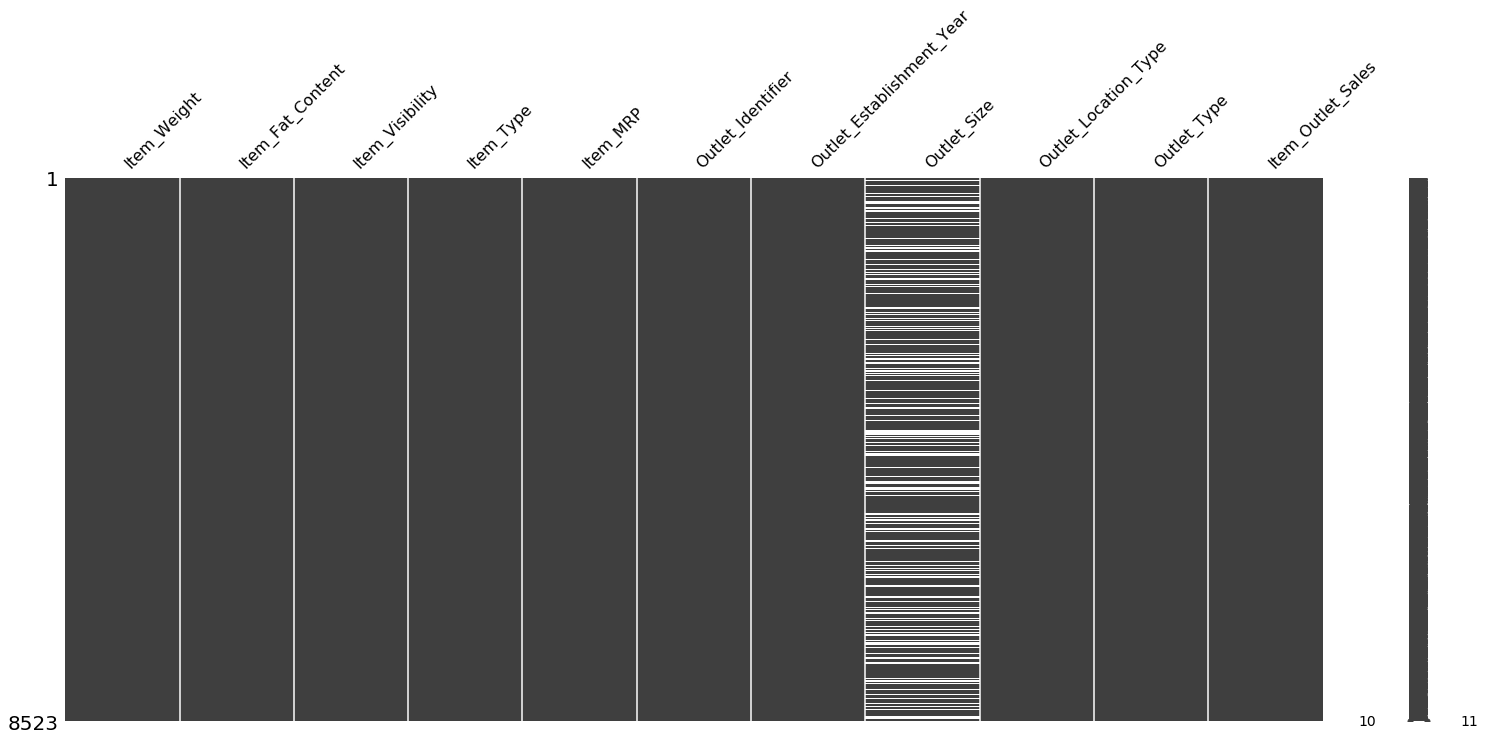

In [13]:
msno.matrix(data)

In [14]:
X1 = 'Outlet_Establishment_Year'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Outlet_Size']].isnull().sum()/f[k])

1985 Outlet_Size    0.0
dtype: float64
1987 Outlet_Size    0.0
dtype: float64
1999 Outlet_Size    0.0
dtype: float64
1997 Outlet_Size    0.0
dtype: float64
2004 Outlet_Size    0.0
dtype: float64
2002 Outlet_Size    1.0
dtype: float64
2009 Outlet_Size    0.0
dtype: float64
2007 Outlet_Size    1.0
dtype: float64
1998 Outlet_Size    1.0
dtype: float64


The sizes of the outlets established in the year 2002, 2007 and 1998 are not available.

In [15]:
X1 = 'Outlet_Type'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Outlet_Size']].isnull().sum()/f[k])

Supermarket Type1 Outlet_Size    0.332616
dtype: float64
Grocery Store Outlet_Size    0.512465
dtype: float64
Supermarket Type3 Outlet_Size    0.0
dtype: float64
Supermarket Type2 Outlet_Size    0.0
dtype: float64


In [16]:
X1 = 'Outlet_Location_Type'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Outlet_Size']].isnull().sum()/f[k])

Tier 3 Outlet_Size    0.165672
dtype: float64
Tier 2 Outlet_Size    0.666068
dtype: float64
Tier 1 Outlet_Size    0.0
dtype: float64


In [17]:
X1 = 'Outlet_Identifier'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Outlet_Size']].isnull().sum()/f[k])

OUT027 Outlet_Size    0.0
dtype: float64
OUT013 Outlet_Size    0.0
dtype: float64
OUT035 Outlet_Size    0.0
dtype: float64
OUT046 Outlet_Size    0.0
dtype: float64
OUT049 Outlet_Size    0.0
dtype: float64
OUT045 Outlet_Size    1.0
dtype: float64
OUT018 Outlet_Size    0.0
dtype: float64
OUT017 Outlet_Size    1.0
dtype: float64
OUT010 Outlet_Size    1.0
dtype: float64
OUT019 Outlet_Size    0.0
dtype: float64


The size of the outlets for outlet ID 045, 017, 010 are not available.

In [18]:
data.loc[data.Outlet_Identifier=='OUT045','Outlet_Size'] = 'Unk1'
data.loc[data.Outlet_Identifier=='OUT017','Outlet_Size'] = 'Unk2'
data.loc[data.Outlet_Identifier=='OUT010','Outlet_Size'] = 'Unk3'

In [19]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Unk1       929
Unk2       926
Unk3       555
Name: Outlet_Size, dtype: int64

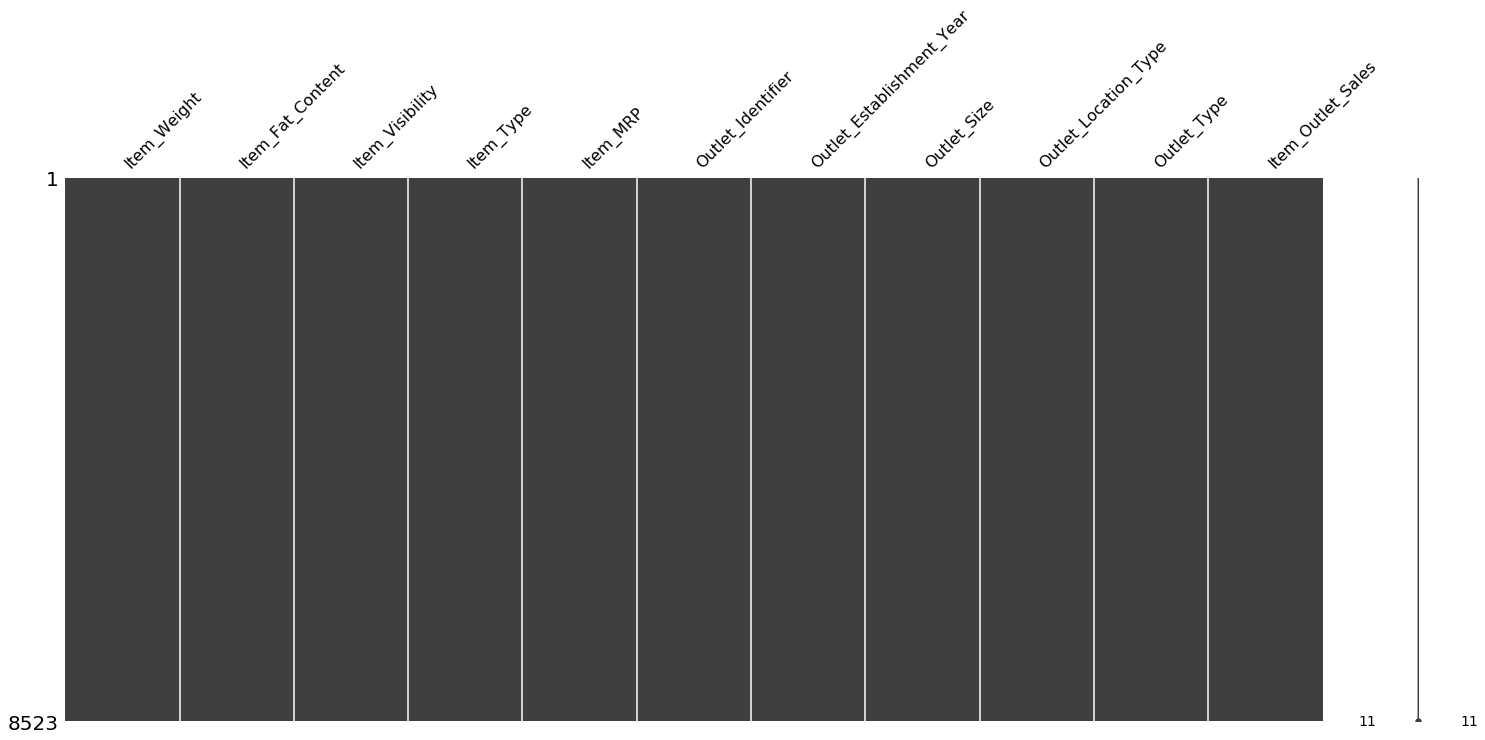

In [20]:
msno.matrix(data)

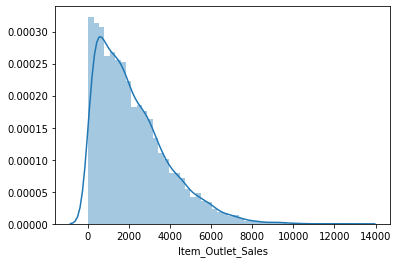

In [21]:
#Detecting Outliers
sns.distplot(data['Item_Outlet_Sales'])

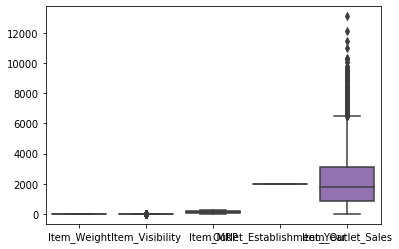

In [22]:
#Detecting Outliers
sns.boxplot(data=data)

Removing Outliers(Sales > 9000)

In [23]:
data = data[data.Item_Outlet_Sales <9000]
data


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unk3,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unk1,Tier 2,Supermarket Type1,549.2850
NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


23 Outliers were removed

In [24]:
data=pd.get_dummies(data,drop_first = True)




In [25]:
data.dtypes==object
data.head()





,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unk1,Outlet_Size_Unk2,Outlet_Size_Unk3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDA15,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
DRC01,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
FDN15,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
FDX07,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
NCD19,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Item_Outlet_Sales',axis=1),data['Item_Outlet_Sales'] , test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
print('Training score : ', clf.score(X_train, y_train))
print('Testing score : ', clf.score(X_test, y_test))

Training score :  0.5597323468629698
Testing score :  0.5712751689315801


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


n_estimators = [int(x) for x in np.linspace(10, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

regressor = RandomForestRegressor()
random = RandomizedSearchCV(regressor,params)



In [32]:
reg = random.fit(X_train, y_train)


# print(random.best_params_)
print(random.score(X_train, y_train))
print(random.score(X_test, y_test))

   

In [44]:
test = pd.read_csv('Test.csv',index_col='Item_Identifier')
test.head()
df=test['Outlet_Identifier']

In [45]:


#Replacing the NaN values of "Item_Weights" by the mean of the remaining values of "Item_Weights".

test.Item_Weight.fillna(data.Item_Weight.mean(), inplace = True)

#Replacing the NaN values of "Outlet_Size" by 3 categorical variables for each of its corresponding "Outlet_Identifier".

test.loc[test.Outlet_Identifier=='OUT045','Outlet_Size'] = 'Unk1'
test.loc[test.Outlet_Identifier=='OUT017','Outlet_Size'] = 'Unk2'
test.loc[test.Outlet_Identifier=='OUT010','Outlet_Size'] = 'Unk3'
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDW58,20.7500,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDW14,8.3000,reg,0.038428,Dairy,87.3198,OUT017,2007,Unk2,Tier 2,Supermarket Type1
NCN55,14.6000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Unk3,Tier 3,Grocery Store
FDQ58,7.3150,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Unk2,Tier 2,Supermarket Type1
FDY38,12.8589,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [46]:
test.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [47]:
test.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [59]:
test=pd.get_dummies(test, drop_first = True)
test.head()




,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unk1,Outlet_Size_Unk2,Outlet_Size_Unk3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDW58,20.7500,0.007565,107.8622,1999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
FDW14,8.3000,0.038428,87.3198,2007,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
NCN55,14.6000,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
FDQ58,7.3150,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
FDY38,12.8589,0.118599,234.2300,1985,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [88]:
fin = random.predict(test)
fin.shape


(5681,)

In [89]:
fin = pd.DataFrame(fin, columns = ['Item_Outlet_Sales'], index=test.index)



In [90]:
fin.to_csv('Values.csv')

In [91]:
fin.shape


(5681, 1)

In [92]:
df.head()

Item_Identifier
FDW58    OUT049
FDW14    OUT017
NCN55    OUT010
FDQ58    OUT017
FDY38    OUT027
Name: Outlet_Identifier, dtype: object

In [93]:
fin.head()

,Item_Outlet_Sales
Item_Identifier,
FDW58,1656.579198
FDW14,1290.171730
NCN55,554.434391
FDQ58,2253.005280
FDY38,6133.761084


In [94]:
df.shape


(5681,)

In [95]:
fin.shape

(5681, 1)

In [97]:
fin=pd.concat([fin,df] , axis=1)

In [98]:
fin.shape

(5681, 2)

In [99]:
fin.to_csv('Values.csv')